In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [2]:
a = pd.read_csv('~/Downloads/airbnb-listings.csv', delimiter = ';', low_memory = False)

In [3]:
a.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [4]:
df = a[a['Country'] == 'United States']

In [5]:
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
241,16163330,https://www.airbnb.com/rooms/16163330,20170510102046,2017-05-10,Quiet Space to sleep & rest,"Hello. Small bedroom with twin bed, chair, ni...",NaN,"Hello. Small bedroom with twin bed, chair, ni...",none,NaN,...,10.0,9.0,10.0,NaN,"Illinois State, Cook County, IL, CHICAGO",strict,2.0,3.49,"41.91128175345432,-87.70246313637992","Host Has Profile Pic,Is Location Exact,Require..."
242,6846209,https://www.airbnb.com/rooms/6846209,20170510102046,2017-05-10,Rogue Philanthropy Manor,Our Humboldt Park home features 1.5 bathrooms ...,Old 120-year-old farm house appeal. Not a typ...,Our Humboldt Park home features 1.5 bathrooms ...,none,Humboldt Park is an emerging Chicago neighborh...,...,10.0,9.0,10.0,City registration pending,"Illinois State, Cook County, IL, CHICAGO",flexible,1.0,1.82,"41.90666965800253,-87.71429140769317","Host Is Superhost,Host Has Profile Pic,Host Id..."
243,6448745,https://www.airbnb.com/rooms/6448745,20170510102046,2017-05-10,1 Bedroom in Beautiful Humboldt Park,Come stay in the beautiful Humboldt Park Neigh...,This is a private room with a queen bed locate...,Come stay in the beautiful Humboldt Park Neigh...,none,The park has a lot to offer. -tennis courts / ...,...,10.0,10.0,10.0,City registration pending,"Illinois State, Cook County, IL, CHICAGO",moderate,1.0,2.00,"41.905263970734715,-87.710297490264","Host Has Profile Pic,Host Identity Verified,Is..."
244,18139782,https://www.airbnb.com/rooms/18139782,20170510102046,2017-05-10,Private Entry 2 Bdrm near Transit,This sunny 2nd floor 2 bedroom unit is newly r...,"A private, locked remodeled 2 bedroom, 1 bathr...",This sunny 2nd floor 2 bedroom unit is newly r...,none,Humboldt Park is a diverse and vibrant communi...,...,10.0,9.0,10.0,City registration pending,"Illinois State, Cook County, IL, CHICAGO",flexible,2.0,6.00,"41.89635191197846,-87.72976298046008","Host Has Profile Pic,Host Identity Verified,Re..."
245,12467112,https://www.airbnb.com/rooms/12467112,20170510102046,2017-05-10,Beautiful Eco-Friendly Room in Garfield Park,Come stay with us in our beautiful home in Chi...,The house is beautifully refurbished with dark...,Come stay with us in our beautiful home in Chi...,none,"Historically, this neighborhood was a retreat ...",...,10.0,8.0,9.0,City registration pending,"Illinois State, Cook County, IL, CHICAGO",strict,3.0,6.58,"41.887172332630705,-87.70764984198293","Host Has Profile Pic,Host Identity Verified,Is..."


In [12]:
df.Bedrooms.unique()

array([ 1.,  2.,  3.,  5.,  0.,  4.,  6.,  7., nan,  8., 10.,  9.])

In [13]:
df = df[df['Price'].notna()]

In [8]:
df1 = df.drop(['Listing Url','Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url','Host URL','Host Thumbnail Url', 
              'Host Picture Url','Latitude', 'Longitude'], axis = 1)

In [14]:
df1.shape

(132581, 79)

In [15]:
df1_n = df1.select_dtypes(include = np.number)

In [16]:
df1_n.shape

(132581, 32)

In [17]:
df1_c = df1.select_dtypes(include = object)

In [19]:
df1_c.shape

(132581, 47)

In [20]:
df1_c.head()

,ID,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,...,Calendar Updated,Has Availability,Calendar last Scraped,First Review,Last Review,License,Jurisdiction Names,Cancellation Policy,Geolocation,Features
241,16163330,20170510102046,2017-05-10,Quiet Space to sleep & rest,"Hello. Small bedroom with twin bed, chair, ni...",NaN,"Hello. Small bedroom with twin bed, chair, ni...",none,NaN,NaN,...,2 weeks ago,NaN,2017-05-10,2017-01-02,2017-04-29,NaN,"Illinois State, Cook County, IL, CHICAGO",strict,"41.91128175345432,-87.70246313637992","Host Has Profile Pic,Is Location Exact,Require..."
242,6846209,20170510102046,2017-05-10,Rogue Philanthropy Manor,Our Humboldt Park home features 1.5 bathrooms ...,Old 120-year-old farm house appeal. Not a typ...,Our Humboldt Park home features 1.5 bathrooms ...,none,Humboldt Park is an emerging Chicago neighborh...,"My husband, Dave, is a local Chicago chef and ...",...,5 weeks ago,NaN,2017-05-10,2015-07-06,2016-11-07,City registration pending,"Illinois State, Cook County, IL, CHICAGO",flexible,"41.90666965800253,-87.71429140769317","Host Is Superhost,Host Has Profile Pic,Host Id..."
243,6448745,20170510102046,2017-05-10,1 Bedroom in Beautiful Humboldt Park,Come stay in the beautiful Humboldt Park Neigh...,This is a private room with a queen bed locate...,Come stay in the beautiful Humboldt Park Neigh...,none,The park has a lot to offer. -tennis courts / ...,*I keep a few things in the closet but they ar...,...,today,NaN,2017-05-10,2017-05-05,2017-05-07,City registration pending,"Illinois State, Cook County, IL, CHICAGO",moderate,"41.905263970734715,-87.710297490264","Host Has Profile Pic,Host Identity Verified,Is..."
244,18139782,20170510102046,2017-05-10,Private Entry 2 Bdrm near Transit,This sunny 2nd floor 2 bedroom unit is newly r...,"A private, locked remodeled 2 bedroom, 1 bathr...",This sunny 2nd floor 2 bedroom unit is newly r...,none,Humboldt Park is a diverse and vibrant communi...,We are a quiet neighborhood with only a few lo...,...,today,NaN,2017-05-10,2017-04-15,2017-05-09,City registration pending,"Illinois State, Cook County, IL, CHICAGO",flexible,"41.89635191197846,-87.72976298046008","Host Has Profile Pic,Host Identity Verified,Re..."
245,12467112,20170510102046,2017-05-10,Beautiful Eco-Friendly Room in Garfield Park,Come stay with us in our beautiful home in Chi...,The house is beautifully refurbished with dark...,Come stay with us in our beautiful home in Chi...,none,"Historically, this neighborhood was a retreat ...",We do everything possible to make sure your st...,...,today,NaN,2017-05-10,2016-05-11,2017-05-09,City registration pending,"Illinois State, Cook County, IL, CHICAGO",strict,"41.887172332630705,-87.70764984198293","Host Has Profile Pic,Host Identity Verified,Is..."


In [21]:
df1_n.isnull().sum()

Host ID                                0
Host Response Rate                 29938
Host Listings Count                  285
Host Total Listings Count            285
Accommodates                          61
Bathrooms                            419
Bedrooms                             156
Beds                                 220
Square Feet                       130544
Price                                  0
Weekly Price                      109674
Monthly Price                     105290
Security Deposit                   75263
Cleaning Fee                       36509
Guests Included                        0
Extra People                           0
Minimum Nights                         0
Maximum Nights                         0
Availability 30                        0
Availability 60                        0
Availability 90                        0
Availability 365                       0
Number of Reviews                      0
Review Scores Rating               31096
Review Scores Ac

In [22]:
df1_n1 = df1_n.drop(['Host Listings Count','Host Total Listings Count','Square Feet','Weekly Price','Monthly Price'], axis = 1)

In [93]:
df1_n1.shape

(132581, 27)

In [94]:
df4 = df1_n1 

In [95]:
m = df4['Review Scores Rating'].mode()
m

0    100.0
dtype: float64

In [97]:
df4['Review Scores Rating'] = df4['Review Scores Rating'].fillna(100)

In [98]:
df4['Review Scores Rating'].isnull().sum()

0

In [99]:
df4.isnull().sum()

Host ID                             0
Host Response Rate                  0
Accommodates                       61
Bathrooms                         419
Bedrooms                          156
Beds                              220
Price                               0
Security Deposit                    0
Cleaning Fee                        0
Guests Included                     0
Extra People                        0
Minimum Nights                      0
Maximum Nights                      0
Availability 30                     0
Availability 60                     0
Availability 90                     0
Availability 365                    0
Number of Reviews                   0
Review Scores Rating                0
Review Scores Accuracy              0
Review Scores Cleanliness           0
Review Scores Checkin               0
Review Scores Communication         0
Review Scores Location              0
Review Scores Value                 0
Calculated host listings count      0
Reviews per 

In [100]:
df["Review Scores Accuracy"].mode()

0    10.0
dtype: float64

In [102]:
df4['Review Scores Accuracy'] = df4['Review Scores Accuracy'].fillna(10)

In [103]:
df["Review Scores Cleanliness"].mode()

0    10.0
dtype: float64

In [104]:
df4['Review Scores Cleanliness'] = df4['Review Scores Cleanliness'].fillna(10)

In [105]:
df["Review Scores Checkin"].mode()

0    10.0
dtype: float64

In [106]:
df4['Review Scores Checkin'] = df4['Review Scores Checkin'].fillna(10)

In [107]:
df4["Review Scores Communication"].mode()

0    10.0
dtype: float64

In [108]:
df4["Review Scores Communication"] = df4["Review Scores Communication"].fillna(10)

In [109]:
df4["Review Scores Location"].mode()

0    10.0
dtype: float64

In [110]:
df4["Review Scores Location"] = df4["Review Scores Location"].fillna(10)

In [111]:
df4["Review Scores Value"].mode()

0    10.0
dtype: float64

In [112]:
df4["Review Scores Value"] = df4["Review Scores Value"].fillna(10)

In [113]:
df4.shape

(132581, 27)

In [115]:
df4.isnull().sum()

Host ID                             0
Host Response Rate                  0
Accommodates                       61
Bathrooms                         419
Bedrooms                          156
Beds                              220
Price                               0
Security Deposit                    0
Cleaning Fee                        0
Guests Included                     0
Extra People                        0
Minimum Nights                      0
Maximum Nights                      0
Availability 30                     0
Availability 60                     0
Availability 90                     0
Availability 365                    0
Number of Reviews                   0
Review Scores Rating                0
Review Scores Accuracy              0
Review Scores Cleanliness           0
Review Scores Checkin               0
Review Scores Communication         0
Review Scores Location              0
Review Scores Value                 0
Calculated host listings count      0
Reviews per 

In [116]:
df4['Security Deposit'].median()

250.0

In [117]:
df4['Security Deposit'] = df4['Security Deposit'].fillna(250)

In [118]:
df4['Cleaning Fee'].median()

50.0

In [119]:
df4['Cleaning Fee'] = df4['Cleaning Fee'].fillna(50)

In [120]:
df4['Host Response Rate'].mode()

0    100.0
dtype: float64

In [121]:
df4['Host Response Rate'] = df4['Host Response Rate'].fillna(100)

In [122]:
df4['Reviews per Month'].mode() 

0    1.0
dtype: float64

In [125]:
df4['Reviews per Month'] = df4['Reviews per Month'].fillna(1)

In [126]:
df4.shape

(132581, 27)

In [128]:
df4.isnull().sum()

Host ID                             0
Host Response Rate                  0
Accommodates                       61
Bathrooms                         419
Bedrooms                          156
Beds                              220
Price                               0
Security Deposit                    0
Cleaning Fee                        0
Guests Included                     0
Extra People                        0
Minimum Nights                      0
Maximum Nights                      0
Availability 30                     0
Availability 60                     0
Availability 90                     0
Availability 365                    0
Number of Reviews                   0
Review Scores Rating                0
Review Scores Accuracy              0
Review Scores Cleanliness           0
Review Scores Checkin               0
Review Scores Communication         0
Review Scores Location              0
Review Scores Value                 0
Calculated host listings count      0
Reviews per 

In [129]:
df4['Accommodates'].mode()

0    2.0
dtype: float64

In [130]:
df4['Accommodates'] = df4['Accommodates'].fillna(2)

In [131]:
df4['Bathrooms'].mode()

0    1.0
dtype: float64

In [132]:
df4['Bathrooms'] = df4['Bathrooms'].fillna(1)

In [133]:
df4['Bedrooms'].mode()

0    1.0
dtype: float64

In [134]:
df4['Bedrooms'] = df4['Bedrooms'].fillna(1)

In [135]:
df4['Beds'].mode()

0    1.0
dtype: float64

In [138]:
df4['Beds'] = df4['Beds'].fillna(1)

In [139]:
df4.head()

,Host ID,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
241,3836635,100.0,1.0,1.0,1.0,1.0,20.0,250.0,7.0,1.0,...,15.0,100.0,10.0,10.0,10.0,10.0,9.0,10.0,2.0,3.49
242,35874075,100.0,2.0,1.5,1.0,1.0,60.0,250.0,10.0,2.0,...,41.0,96.0,10.0,10.0,10.0,10.0,9.0,10.0,1.0,1.82
243,27538050,100.0,2.0,1.0,1.0,1.0,39.0,250.0,5.0,2.0,...,2.0,100.0,10.0,9.0,10.0,10.0,10.0,10.0,1.0,2.00
244,22308676,100.0,6.0,1.0,2.0,3.0,60.0,250.0,15.0,2.0,...,6.0,97.0,9.0,9.0,10.0,10.0,9.0,10.0,2.0,6.00
245,1284557,96.0,2.0,1.0,1.0,1.0,39.0,250.0,9.0,1.0,...,80.0,96.0,10.0,9.0,10.0,10.0,8.0,9.0,3.0,6.58


In [143]:
df1_c.isnull().sum()

ID                                   0
Scrape ID                            0
Last Scraped                         0
Name                                49
Summary                           4139
Space                            37594
Description                         46
Experiences Offered                  0
Neighborhood Overview            50839
Notes                            74465
Transit                          48338
Access                           56087
Interaction                      58865
House Rules                      47613
Host Name                          285
Host Since                         285
Host Location                      861
Host About                       47460
Host Response Time               29938
Host Acceptance Rate            113975
Host Neighbourhood               21404
Host Verifications                  58
Street                               0
Neighbourhood                    26359
Neighbourhood Cleansed               0
Neighbourhood Group Clean

In [145]:
df1_c['Host Location'].unique()

array(['Chicago, Illinois, United States', 'US', 'United States', ...,
       'Cottesloe, Western Australia, Australia',
       'Carmel-by-the-Sea, California, United States',
       'Longview, Texas, United States'], dtype=object)

In [146]:
df6 = df1_c.drop(['Scrape ID','ID','Name','Summary','Description','Experiences Offered','Neighborhood Overview','Notes','Transit','Access',
           'Interaction','House Rules','Host Name','Host About','Host Verifications','Amenities','Calendar Updated',
            'Has Availability','Geolocation','Features','License','Host Acceptance Rate',
                  'Neighbourhood Group Cleansed','Space','Host Since','Host Location','First Review','Last Review',
                 'Jurisdiction Names','Last Scraped','Smart Location','Country Code','Country',
                  'Calendar last Scraped','City','Street'], axis = 1)

In [147]:
df6.shape

(132581, 11)

In [148]:
(df6.isnull().sum()/len(df6))*100

Host Response Time        22.580913
Host Neighbourhood        16.144093
Neighbourhood             19.881431
Neighbourhood Cleansed     0.000000
State                      0.002263
Zipcode                    1.255836
Market                     0.761044
Property Type              0.004526
Room Type                  0.000000
Bed Type                   0.000000
Cancellation Policy        0.000000
dtype: float64

In [149]:
df6['Property Type'].unique()

array(['Apartment', 'House', 'Townhouse', 'Condominium', 'Guesthouse',
       'Other', 'Camper/RV', 'Bungalow', 'Villa', 'Treehouse',
       'Bed & Breakfast', 'Loft', 'Cabin', 'Dorm', 'Hostel', 'Chalet',
       'Boat', 'Tent', 'Guest suite', 'In-law', 'Lighthouse',
       'Serviced apartment', 'Hut', 'Boutique hotel', 'Timeshare', 'Yurt',
       nan, 'Castle', 'Tipi', 'Nature lodge', 'Train', 'Cave',
       'Earth House', 'Parking Space', 'Entire Floor', 'Vacation home',
       'Island', 'Casa particular', 'Plane', 'Pension (Korea)'],
      dtype=object)

In [151]:
df6['Host Response Time'] = df6['Host Response Time'].fillna('within an hour')

In [152]:
df6["Host Neighbourhood"] = df6["Host Neighbourhood"].fillna('Williamsburg')

In [153]:
df6['Neighbourhood'] = df6['Neighbourhood'].fillna('Williamsburg')

In [159]:
df6['State'] = df6['State'].fillna('CA')

In [160]:
df6['Zipcode'] = df6['Zipcode'].fillna('11211')

In [161]:
df6['Market'] = df6['Market'].fillna('New York')

In [164]:
df6['Property Type'] = df6['Property Type'].fillna('Apartment')

In [165]:
df6['Host Neighbourhood'].unique()

array(['Humboldt Park', 'Garfield Park', 'Near West Side', ...,
       'Golden Glades', 'Lahaina', 'Rose Garden'], dtype=object)

In [167]:
hrt = {'within an hour':1,'within a few hours':2,'within a day':3,'a few days or more':4}

In [168]:
df6['HostResponseTime_ord'] = df6['Host Response Time'].map(hrt)

In [169]:
df6['HostResponseTime_ord']

241       1
242       3
243       1
244       1
245       1
         ..
494567    1
494568    1
494569    1
494570    1
494571    1
Name: HostResponseTime_ord, Length: 132581, dtype: int64

In [171]:
freq = (df6['Host Neighbourhood'].value_counts()/len(df6['Host Neighbourhood']))*100

In [172]:
df6['HostNeighbourhood_freq'] = df6['Host Neighbourhood'].map(freq)

In [173]:
df6['HostNeighbourhood_freq'].isnull().sum()

0

In [174]:
df6['Neighbourhood Cleansed'].unique()

array(['Humboldt Park', 'East Garfield Park', 'South Lawndale', ...,
       'Bay Terrace, Staten Island', 'Sobrante Park', 'Seminary'],
      dtype=object)

In [175]:
freq1 = (df6['Neighbourhood Cleansed'].value_counts()/len(df6['Neighbourhood Cleansed']))*100

In [177]:
df6['NeighbourhoodCleansed_freq'] = df6['Neighbourhood Cleansed'].map(freq1)

In [221]:
df6['NeighbourhoodCleansed_freq']

241       0.036959
242       0.036959
243       0.036959
244       0.036959
245       0.040730
            ...   
494567    0.043747
494568    0.043747
494569    0.144817
494570    0.144817
494571    0.144817
Name: NeighbourhoodCleansed_freq, Length: 132581, dtype: float64

In [222]:
df6['State'].unique()

array(['IL', 'CA', 'CO', 'TN', 'LA', 'ca', 'MA', 'TX', 'OR', 'WA', 'wa',
       'DC', 'NY', 'ny', 'MP', 'MD', 'il', 'Il', 'NJ', 'Ca', 'VT'],
      dtype=object)

In [223]:
freq3 = (df6['State'].value_counts()/len(df6['State']))*100

In [224]:
df6['State_freq'] = df6['State'].map(freq3)

In [225]:
df6['Zipcode'].unique()

array(['60647', '60651', '60624', '11211', '60612', '60623', '60616',
       '60608', '60613', '60618', '60617', '60638', '60657', '60614',
       '60621', '60660', '60640', '60629', '60625', '60615', '60637',
       '60622', '60654', '60661', '60607', '60626', '60646', '60645',
       '60659', '60642', '60605', '60631', '60610', '60611', '91381',
       '91604', '90068', '91602', '90292', '90015', '90291', '90016',
       '90043', '90059', '91745', '91789', '91607', '91606', '91605',
       '90057', '90026', '90017', '90006', '91361', '91746', '90024',
       '90049', '90601', '90020', '91367', '91364', '91356', '91007',
       '91780', '90290', '90248', '91791', '92880', '90045', '90293',
       '90025', '90069', '90403', '90404', '90405', '90402', '91040',
       '91423', '91411', '91403', '90039', '91733', '90046', '90048',
       '90005', '90505', '90503', '90504', '91042', '90265', '91311',
       '90007', '60602', '60601', '60649', '80212', '80205', '80218',
       '80206', '802

In [226]:
freq4 = (df6['Zipcode'].value_counts()/len(df6['Zipcode']))*100

In [227]:
df6['Zipcode_freq'] = df6['Zipcode'].map(freq4)

In [228]:
df6['Zipcode_freq']

241       0.345449
242       0.022628
243       0.022628
244       0.022628
245       0.027153
            ...   
494567    0.045255
494568    0.045255
494569    0.141046
494570    0.141046
494571    0.141046
Name: Zipcode_freq, Length: 132581, dtype: float64

In [229]:
df6['Market'].unique()

array(['Chicago', 'Other (Domestic)', 'Los Angeles', 'New York',
       'South Bay, CA', 'Malibu', 'Denver', 'Nashville', 'New Orleans',
       'Coastal Orange County', 'Fontana', 'Boston', 'Austin',
       'Philadelphia', 'Portland', 'San Diego', 'San Francisco',
       'Monterey Region', 'Seattle', 'D.C.', 'Dallas',
       'Other (International)', 'Pittsburg', 'Boulder', 'Carlsbad',
       'Rio De Janeiro', 'Toms River', 'East Bay, CA',
       'Catskills and Hudson Valley', 'Monaco and Menton', 'Agra',
       'South Florida Gulf Coast', 'Nice', 'Jamaica South Coast',
       'Toronto', 'Columbia, SC', 'Palm Springs Desert', 'Adirondacks',
       'Berlin', 'Lagos, NG', 'Bristol', 'Jerusalem', 'Temecula Valley',
       'Houston', 'London', 'Flims', 'Venice', 'College Station',
       'Santa Fe', 'Portland, Maine', 'Miami', 'Dubai', 'Santiago',
       'Aspen and Vail', 'Tuscany Countryside', 'Napa Region', 'Fresno',
       'Sacramento', 'Chico', 'San Antonio, US', 'Chattanooga',
       '

In [91]:
freq5 = (df6['Market'].value_counts()/len(df6['Market']))*100

In [92]:
df6['Market_freq'] = df6['Market'].map(freq5)

In [ ]:
df6['Market_freq']

In [233]:
df6['Property Type'].unique()

array(['Apartment', 'House', 'Townhouse', 'Condominium', 'Guesthouse',
       'Other', 'Camper/RV', 'Bungalow', 'Villa', 'Treehouse',
       'Bed & Breakfast', 'Loft', 'Cabin', 'Dorm', 'Hostel', 'Chalet',
       'Boat', 'Tent', 'Guest suite', 'In-law', 'Lighthouse',
       'Serviced apartment', 'Hut', 'Boutique hotel', 'Timeshare', 'Yurt',
       'Castle', 'Tipi', 'Nature lodge', 'Train', 'Cave', 'Earth House',
       'Parking Space', 'Entire Floor', 'Vacation home', 'Island',
       'Casa particular', 'Plane', 'Pension (Korea)'], dtype=object)

In [234]:
freq6 = (df6['Property Type'].value_counts()/len(df6['Property Type']))*100

In [235]:
df6['PropertyType_freq'] = df6['Property Type'].map(freq6)

In [236]:
df6['PropertyType_freq']

241       57.091137
242       30.984832
243       57.091137
244       57.091137
245       30.984832
            ...    
494567    57.091137
494568    30.984832
494569    30.984832
494570    30.984832
494571    30.984832
Name: PropertyType_freq, Length: 132581, dtype: float64

In [237]:
df6['Cancellation Policy'].unique()

array(['strict', 'flexible', 'moderate', 'no_refunds', 'super_strict_30',
       'super_strict_60', 'long_term'], dtype=object)

In [238]:
df6.head()

,Host Response Time,Host Neighbourhood,Neighbourhood,Neighbourhood Cleansed,State,Zipcode,Market,Property Type,Room Type,Bed Type,Cancellation Policy,HostResponseTime_ord,HostNeighbourhood_freq,NeighbourhoodCleansed_freq,State_freq,Zipcode_freq,Market_freq,PropertyType_freq
241,within an hour,Humboldt Park,Humboldt Park,Humboldt Park,IL,60647,Chicago,Apartment,Private room,Real Bed,strict,1,0.124452,0.036959,3.911571,0.345449,3.892715,57.091137
242,within a day,Humboldt Park,Humboldt Park,Humboldt Park,IL,60651,Chicago,House,Private room,Real Bed,flexible,3,0.124452,0.036959,3.911571,0.022628,3.892715,30.984832
243,within an hour,Humboldt Park,Humboldt Park,Humboldt Park,IL,60651,Chicago,Apartment,Private room,Real Bed,moderate,1,0.124452,0.036959,3.911571,0.022628,3.892715,57.091137
244,within an hour,Humboldt Park,Williamsburg,Humboldt Park,IL,60651,Chicago,Apartment,Entire home/apt,Real Bed,flexible,1,0.124452,0.036959,3.911571,0.022628,3.892715,57.091137
245,within an hour,Garfield Park,Garfield Park,East Garfield Park,IL,60624,Chicago,House,Private room,Real Bed,strict,1,0.030924,0.040730,3.911571,0.027153,3.892715,30.984832


In [178]:
df6['Neighbourhood'].unique()

array(['Humboldt Park', 'Williamsburg', 'Garfield Park', ...,
       'Southeast Oakland Hills', 'Chillum, MD', 'Richmond Annex'],
      dtype=object)

In [179]:
freq7 = (df6['Neighbourhood'].value_counts()/len(df6['Neighbourhood']))*100

In [180]:
df6['Neighbourhood_freq'] = df6['Neighbourhood'].map(freq7)

In [242]:
df6['Neighbourhood_freq']

241        0.116910
242        0.116910
243        0.116910
244       22.362933
245        0.030924
            ...    
494567     0.036959
494568     0.036959
494569     0.121435
494570     0.121435
494571     0.121435
Name: Neighbourhood_freq, Length: 132581, dtype: float64

In [243]:
(df6.isnull().sum()/len(df6))*100

Host Response Time            0.0
Host Neighbourhood            0.0
Neighbourhood                 0.0
Neighbourhood Cleansed        0.0
State                         0.0
Zipcode                       0.0
Market                        0.0
Property Type                 0.0
Room Type                     0.0
Bed Type                      0.0
Cancellation Policy           0.0
HostResponseTime_ord          0.0
HostNeighbourhood_freq        0.0
NeighbourhoodCleansed_freq    0.0
State_freq                    0.0
Zipcode_freq                  0.0
Market_freq                   0.0
PropertyType_freq             0.0
Neighbourhood_freq            0.0
dtype: float64

In [244]:
len(df6['Cancellation Policy'].unique())

7

In [245]:
(df6.isnull().sum()/len(df6))*100

Host Response Time            0.0
Host Neighbourhood            0.0
Neighbourhood                 0.0
Neighbourhood Cleansed        0.0
State                         0.0
Zipcode                       0.0
Market                        0.0
Property Type                 0.0
Room Type                     0.0
Bed Type                      0.0
Cancellation Policy           0.0
HostResponseTime_ord          0.0
HostNeighbourhood_freq        0.0
NeighbourhoodCleansed_freq    0.0
State_freq                    0.0
Zipcode_freq                  0.0
Market_freq                   0.0
PropertyType_freq             0.0
Neighbourhood_freq            0.0
dtype: float64

In [246]:
df7 = pd.get_dummies(df6[['Room Type', 'Bed Type', 'Cancellation Policy']], drop_first = True)

In [247]:
df7

,Room Type_Private room,Room Type_Shared room,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Cancellation Policy_long_term,Cancellation Policy_moderate,Cancellation Policy_no_refunds,Cancellation Policy_strict,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
241,1,0,0,0,0,1,0,0,0,1,0,0
242,1,0,0,0,0,1,0,0,0,0,0,0
243,1,0,0,0,0,1,0,1,0,0,0,0
244,0,0,0,0,0,1,0,0,0,0,0,0
245,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
494567,0,0,0,0,0,1,0,0,0,0,0,0
494568,1,0,0,0,0,1,0,0,0,0,0,0
494569,1,0,0,0,0,1,0,0,0,0,0,0
494570,0,0,0,0,0,1,0,1,0,0,0,0


In [248]:
df8=pd.concat([df6,df7],axis=1)

In [249]:
df8

,Host Response Time,Host Neighbourhood,Neighbourhood,Neighbourhood Cleansed,State,Zipcode,Market,Property Type,Room Type,Bed Type,...,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Cancellation Policy_long_term,Cancellation Policy_moderate,Cancellation Policy_no_refunds,Cancellation Policy_strict,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
241,within an hour,Humboldt Park,Humboldt Park,Humboldt Park,IL,60647,Chicago,Apartment,Private room,Real Bed,...,0,0,0,1,0,0,0,1,0,0
242,within a day,Humboldt Park,Humboldt Park,Humboldt Park,IL,60651,Chicago,House,Private room,Real Bed,...,0,0,0,1,0,0,0,0,0,0
243,within an hour,Humboldt Park,Humboldt Park,Humboldt Park,IL,60651,Chicago,Apartment,Private room,Real Bed,...,0,0,0,1,0,1,0,0,0,0
244,within an hour,Humboldt Park,Williamsburg,Humboldt Park,IL,60651,Chicago,Apartment,Entire home/apt,Real Bed,...,0,0,0,1,0,0,0,0,0,0
245,within an hour,Garfield Park,Garfield Park,East Garfield Park,IL,60624,Chicago,House,Private room,Real Bed,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494567,within an hour,Barton Creek,Barton Creek,78735,TX,78735,Austin,Apartment,Entire home/apt,Real Bed,...,0,0,0,1,0,0,0,0,0,0
494568,within an hour,Barton Creek,Barton Creek,78735,TX,78735,Austin,House,Private room,Real Bed,...,0,0,0,1,0,0,0,0,0,0
494569,within an hour,MLK & 183,MLK & 183,78721,TX,78721,Austin,House,Private room,Real Bed,...,0,0,0,1,0,0,0,0,0,0
494570,within an hour,MLK & 183,MLK & 183,78721,TX,78721,Austin,House,Entire home/apt,Real Bed,...,0,0,0,1,0,1,0,0,0,0


In [250]:
(df8.isnull().sum()/len(df8))*100

Host Response Time                     0.0
Host Neighbourhood                     0.0
Neighbourhood                          0.0
Neighbourhood Cleansed                 0.0
State                                  0.0
Zipcode                                0.0
Market                                 0.0
Property Type                          0.0
Room Type                              0.0
Bed Type                               0.0
Cancellation Policy                    0.0
HostResponseTime_ord                   0.0
HostNeighbourhood_freq                 0.0
NeighbourhoodCleansed_freq             0.0
State_freq                             0.0
Zipcode_freq                           0.0
Market_freq                            0.0
PropertyType_freq                      0.0
Neighbourhood_freq                     0.0
Room Type_Private room                 0.0
Room Type_Shared room                  0.0
Bed Type_Couch                         0.0
Bed Type_Futon                         0.0
Bed Type_Pu

In [251]:
df9 = df8.drop(['Host Response Time','Host Neighbourhood','Neighbourhood','Neighbourhood Cleansed',
               'State','Zipcode','Market','Property Type','Room Type','Bed Type','Cancellation Policy'], axis = 1)

In [252]:
df_cat_encoded = df9

In [253]:
df_cat_encoded

,HostResponseTime_ord,HostNeighbourhood_freq,NeighbourhoodCleansed_freq,State_freq,Zipcode_freq,Market_freq,PropertyType_freq,Neighbourhood_freq,Room Type_Private room,Room Type_Shared room,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Cancellation Policy_long_term,Cancellation Policy_moderate,Cancellation Policy_no_refunds,Cancellation Policy_strict,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
241,1,0.124452,0.036959,3.911571,0.345449,3.892715,57.091137,0.116910,1,0,0,0,0,1,0,0,0,1,0,0
242,3,0.124452,0.036959,3.911571,0.022628,3.892715,30.984832,0.116910,1,0,0,0,0,1,0,0,0,0,0,0
243,1,0.124452,0.036959,3.911571,0.022628,3.892715,57.091137,0.116910,1,0,0,0,0,1,0,1,0,0,0,0
244,1,0.124452,0.036959,3.911571,0.022628,3.892715,57.091137,22.362933,0,0,0,0,0,1,0,0,0,0,0,0
245,1,0.030924,0.040730,3.911571,0.027153,3.892715,30.984832,0.030924,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494567,1,0.036959,0.043747,6.964045,0.045255,6.942171,57.091137,0.036959,0,0,0,0,0,1,0,0,0,0,0,0
494568,1,0.036959,0.043747,6.964045,0.045255,6.942171,30.984832,0.036959,1,0,0,0,0,1,0,0,0,0,0,0
494569,1,0.119927,0.144817,6.964045,0.141046,6.942171,30.984832,0.121435,1,0,0,0,0,1,0,0,0,0,0,0
494570,1,0.119927,0.144817,6.964045,0.141046,6.942171,30.984832,0.121435,0,0,0,0,0,1,0,1,0,0,0,0


In [111]:
df4.shape

(132581, 27)

In [112]:
(df4.isnull().sum()/len(df4))*100

Host ID                           0.0
Host Response Rate                0.0
Accommodates                      0.0
Bathrooms                         0.0
Bedrooms                          0.0
Beds                              0.0
Price                             0.0
Security Deposit                  0.0
Cleaning Fee                      0.0
Guests Included                   0.0
Extra People                      0.0
Minimum Nights                    0.0
Maximum Nights                    0.0
Availability 30                   0.0
Availability 60                   0.0
Availability 90                   0.0
Availability 365                  0.0
Number of Reviews                 0.0
Review Scores Rating              0.0
Review Scores Accuracy            0.0
Review Scores Cleanliness         0.0
Review Scores Checkin             0.0
Review Scores Communication       0.0
Review Scores Location            0.0
Review Scores Value               0.0
Calculated host listings count    0.0
Reviews per 

In [113]:
df10 = df4.drop(['Host ID'], axis = 1)

In [114]:
df10

,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
241,100.0,1.0,1.0,1.0,1.0,20.0,250.0,7.0,1.0,0.0,...,15.0,100.0,10.0,10.0,10.0,10.0,9.0,10.0,2.0,3.49
242,100.0,2.0,1.5,1.0,1.0,60.0,250.0,10.0,2.0,25.0,...,41.0,96.0,10.0,10.0,10.0,10.0,9.0,10.0,1.0,1.82
243,100.0,2.0,1.0,1.0,1.0,39.0,250.0,5.0,2.0,15.0,...,2.0,100.0,10.0,9.0,10.0,10.0,10.0,10.0,1.0,2.00
244,100.0,6.0,1.0,2.0,3.0,60.0,250.0,15.0,2.0,10.0,...,6.0,97.0,9.0,9.0,10.0,10.0,9.0,10.0,2.0,6.00
245,96.0,2.0,1.0,1.0,1.0,39.0,250.0,9.0,1.0,10.0,...,80.0,96.0,10.0,9.0,10.0,10.0,8.0,9.0,3.0,6.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494567,100.0,5.0,1.0,2.0,2.0,350.0,250.0,50.0,1.0,0.0,...,1.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0.20
494568,100.0,2.0,1.0,1.0,1.0,250.0,250.0,50.0,1.0,0.0,...,0.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,1.00
494569,100.0,4.0,1.0,2.0,2.0,175.0,250.0,40.0,1.0,0.0,...,0.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,1.00
494570,100.0,6.0,2.0,3.0,3.0,475.0,250.0,75.0,5.0,0.0,...,0.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,1.00


In [115]:
from sklearn.preprocessing import PowerTransformer

In [116]:
pt = PowerTransformer()
trans = pt.fit_transform(df10)

In [117]:
df11 = pd.DataFrame(trans, columns = df10.columns)

In [118]:
df_num_encoded = df11

In [119]:
df_num_encoded

,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
0,0.442374,-1.817371,-0.433181,-0.246826,-0.824713,-2.829488,0.022807,-2.415490,-0.544120,-0.887795,...,0.605841,0.907361,0.521792,0.645175,0.378724,0.368473,-1.587348,0.679343,0.731315,1.341142
1,0.442374,-0.559210,0.761510,-0.246826,-0.824713,-0.985088,0.022807,-2.056132,0.874093,1.155845,...,1.162536,-0.339419,0.521792,0.645175,0.378724,0.368473,-1.587348,0.679343,-0.732494,0.625529
2,0.442374,-0.559210,-0.433181,-0.246826,-0.824713,-1.680376,0.022807,-2.725133,0.874093,0.956738,...,-0.508258,0.907361,0.521792,-1.351961,0.378724,0.368473,0.601531,0.679343,-0.732494,0.733469
3,0.442374,1.293898,-0.433181,0.908157,1.366131,-0.985088,0.022807,-1.609814,0.874093,0.783323,...,0.080734,-0.083020,-1.879802,-1.351961,0.378724,0.368473,-1.587348,0.679343,0.731315,1.851491
4,-0.470286,-0.559210,-0.433181,-0.246826,-0.824713,-1.680376,0.022807,-2.165562,-0.544120,0.783323,...,1.509619,-0.339419,0.521792,-1.351961,0.378724,0.368473,-1.865108,-1.352907,1.256973,1.928591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132576,0.442374,1.019818,-0.433181,0.908157,0.828358,1.476357,0.022807,-0.051661,-0.544120,-0.887795,...,-0.809706,0.907361,0.521792,0.645175,0.378724,0.368473,0.601531,0.679343,-0.732494,-1.398693
132577,0.442374,-0.559210,-0.433181,-0.246826,-0.824713,1.052713,0.022807,-0.051661,-0.544120,-0.887795,...,-1.356530,0.907361,0.521792,0.645175,0.378724,0.368473,0.601531,0.679343,-0.732494,-0.058369
132578,0.442374,0.662955,-0.433181,0.908157,0.828358,0.580743,0.022807,-0.366937,-0.544120,-0.887795,...,-1.356530,0.907361,0.521792,0.645175,0.378724,0.368473,0.601531,0.679343,-0.732494,-0.058369
132579,0.442374,1.293898,1.493109,1.712648,1.366131,1.843401,0.022807,0.553052,2.000619,-0.887795,...,-1.356530,0.907361,0.521792,0.645175,0.378724,0.368473,0.601531,0.679343,-0.732494,-0.058369


,HostResponseTime_ord,HostNeighbourhood_freq,NeighbourhoodCleansed_freq,State_freq,Zipcode_freq,Market_freq,PropertyType_freq,Neighbourhood_freq,Room Type_Private room,Room Type_Shared room,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Cancellation Policy_long_term,Cancellation Policy_moderate,Cancellation Policy_no_refunds,Cancellation Policy_strict,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
241,1,0.124452,0.036959,3.911571,0.345449,3.892715,57.091137,0.116910,1,0,0,0,0,1,0,0,0,1,0,0
242,3,0.124452,0.036959,3.911571,0.022628,3.892715,30.984832,0.116910,1,0,0,0,0,1,0,0,0,0,0,0
243,1,0.124452,0.036959,3.911571,0.022628,3.892715,57.091137,0.116910,1,0,0,0,0,1,0,1,0,0,0,0
244,1,0.124452,0.036959,3.911571,0.022628,3.892715,57.091137,22.362933,0,0,0,0,0,1,0,0,0,0,0,0
245,1,0.030924,0.040730,3.911571,0.027153,3.892715,30.984832,0.030924,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494567,1,0.036959,0.043747,6.964045,0.045255,6.942171,57.091137,0.036959,0,0,0,0,0,1,0,0,0,0,0,0
494568,1,0.036959,0.043747,6.964045,0.045255,6.942171,30.984832,0.036959,1,0,0,0,0,1,0,0,0,0,0,0
494569,1,0.119927,0.144817,6.964045,0.141046,6.942171,30.984832,0.121435,1,0,0,0,0,1,0,0,0,0,0,0
494570,1,0.119927,0.144817,6.964045,0.141046,6.942171,30.984832,0.121435,0,0,0,0,0,1,0,1,0,0,0,0


In [121]:
df_cat_encoded

,HostResponseTime_ord,HostNeighbourhood_freq,NeighbourhoodCleansed_freq,State_freq,Zipcode_freq,Market_freq,PropertyType_freq,Neighbourhood_freq,Room Type_Private room,Room Type_Shared room,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Cancellation Policy_long_term,Cancellation Policy_moderate,Cancellation Policy_no_refunds,Cancellation Policy_strict,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
241,1,0.124452,0.036959,3.911571,0.345449,3.892715,57.091137,0.116910,1,0,0,0,0,1,0,0,0,1,0,0
242,3,0.124452,0.036959,3.911571,0.022628,3.892715,30.984832,0.116910,1,0,0,0,0,1,0,0,0,0,0,0
243,1,0.124452,0.036959,3.911571,0.022628,3.892715,57.091137,0.116910,1,0,0,0,0,1,0,1,0,0,0,0
244,1,0.124452,0.036959,3.911571,0.022628,3.892715,57.091137,22.362933,0,0,0,0,0,1,0,0,0,0,0,0
245,1,0.030924,0.040730,3.911571,0.027153,3.892715,30.984832,0.030924,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494567,1,0.036959,0.043747,6.964045,0.045255,6.942171,57.091137,0.036959,0,0,0,0,0,1,0,0,0,0,0,0
494568,1,0.036959,0.043747,6.964045,0.045255,6.942171,30.984832,0.036959,1,0,0,0,0,1,0,0,0,0,0,0
494569,1,0.119927,0.144817,6.964045,0.141046,6.942171,30.984832,0.121435,1,0,0,0,0,1,0,0,0,0,0,0
494570,1,0.119927,0.144817,6.964045,0.141046,6.942171,30.984832,0.121435,0,0,0,0,0,1,0,1,0,0,0,0


In [122]:
(df_num_encoded.isnull().sum()/len(df_num_encoded))*100

Host Response Rate                0.0
Accommodates                      0.0
Bathrooms                         0.0
Bedrooms                          0.0
Beds                              0.0
Price                             0.0
Security Deposit                  0.0
Cleaning Fee                      0.0
Guests Included                   0.0
Extra People                      0.0
Minimum Nights                    0.0
Maximum Nights                    0.0
Availability 30                   0.0
Availability 60                   0.0
Availability 90                   0.0
Availability 365                  0.0
Number of Reviews                 0.0
Review Scores Rating              0.0
Review Scores Accuracy            0.0
Review Scores Cleanliness         0.0
Review Scores Checkin             0.0
Review Scores Communication       0.0
Review Scores Location            0.0
Review Scores Value               0.0
Calculated host listings count    0.0
Reviews per Month                 0.0
dtype: float

In [123]:
df_num_encoded.shape

(132581, 26)

In [124]:
df_cat_encoded.shape

(132581, 20)

In [125]:
df_num_encoded.isnull().sum()

Host Response Rate                0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Price                             0
Security Deposit                  0
Cleaning Fee                      0
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Availability 30                   0
Availability 60                   0
Availability 90                   0
Availability 365                  0
Number of Reviews                 0
Review Scores Rating              0
Review Scores Accuracy            0
Review Scores Cleanliness         0
Review Scores Checkin             0
Review Scores Communication       0
Review Scores Location            0
Review Scores Value               0
Calculated host listings count    0
Reviews per Month                 0
dtype: int64

In [126]:
df_cat_encoded.isnull().sum()

HostResponseTime_ord                   0
HostNeighbourhood_freq                 0
NeighbourhoodCleansed_freq             0
State_freq                             0
Zipcode_freq                           0
Market_freq                            0
PropertyType_freq                      0
Neighbourhood_freq                     0
Room Type_Private room                 0
Room Type_Shared room                  0
Bed Type_Couch                         0
Bed Type_Futon                         0
Bed Type_Pull-out Sofa                 0
Bed Type_Real Bed                      0
Cancellation Policy_long_term          0
Cancellation Policy_moderate           0
Cancellation Policy_no_refunds         0
Cancellation Policy_strict             0
Cancellation Policy_super_strict_30    0
Cancellation Policy_super_strict_60    0
dtype: int64

In [127]:
df_cat_encoded

,HostResponseTime_ord,HostNeighbourhood_freq,NeighbourhoodCleansed_freq,State_freq,Zipcode_freq,Market_freq,PropertyType_freq,Neighbourhood_freq,Room Type_Private room,Room Type_Shared room,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Cancellation Policy_long_term,Cancellation Policy_moderate,Cancellation Policy_no_refunds,Cancellation Policy_strict,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
241,1,0.124452,0.036959,3.911571,0.345449,3.892715,57.091137,0.116910,1,0,0,0,0,1,0,0,0,1,0,0
242,3,0.124452,0.036959,3.911571,0.022628,3.892715,30.984832,0.116910,1,0,0,0,0,1,0,0,0,0,0,0
243,1,0.124452,0.036959,3.911571,0.022628,3.892715,57.091137,0.116910,1,0,0,0,0,1,0,1,0,0,0,0
244,1,0.124452,0.036959,3.911571,0.022628,3.892715,57.091137,22.362933,0,0,0,0,0,1,0,0,0,0,0,0
245,1,0.030924,0.040730,3.911571,0.027153,3.892715,30.984832,0.030924,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494567,1,0.036959,0.043747,6.964045,0.045255,6.942171,57.091137,0.036959,0,0,0,0,0,1,0,0,0,0,0,0
494568,1,0.036959,0.043747,6.964045,0.045255,6.942171,30.984832,0.036959,1,0,0,0,0,1,0,0,0,0,0,0
494569,1,0.119927,0.144817,6.964045,0.141046,6.942171,30.984832,0.121435,1,0,0,0,0,1,0,0,0,0,0,0
494570,1,0.119927,0.144817,6.964045,0.141046,6.942171,30.984832,0.121435,0,0,0,0,0,1,0,1,0,0,0,0


In [128]:
df_num_encoded

,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
0,0.442374,-1.817371,-0.433181,-0.246826,-0.824713,-2.829488,0.022807,-2.415490,-0.544120,-0.887795,...,0.605841,0.907361,0.521792,0.645175,0.378724,0.368473,-1.587348,0.679343,0.731315,1.341142
1,0.442374,-0.559210,0.761510,-0.246826,-0.824713,-0.985088,0.022807,-2.056132,0.874093,1.155845,...,1.162536,-0.339419,0.521792,0.645175,0.378724,0.368473,-1.587348,0.679343,-0.732494,0.625529
2,0.442374,-0.559210,-0.433181,-0.246826,-0.824713,-1.680376,0.022807,-2.725133,0.874093,0.956738,...,-0.508258,0.907361,0.521792,-1.351961,0.378724,0.368473,0.601531,0.679343,-0.732494,0.733469
3,0.442374,1.293898,-0.433181,0.908157,1.366131,-0.985088,0.022807,-1.609814,0.874093,0.783323,...,0.080734,-0.083020,-1.879802,-1.351961,0.378724,0.368473,-1.587348,0.679343,0.731315,1.851491
4,-0.470286,-0.559210,-0.433181,-0.246826,-0.824713,-1.680376,0.022807,-2.165562,-0.544120,0.783323,...,1.509619,-0.339419,0.521792,-1.351961,0.378724,0.368473,-1.865108,-1.352907,1.256973,1.928591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132576,0.442374,1.019818,-0.433181,0.908157,0.828358,1.476357,0.022807,-0.051661,-0.544120,-0.887795,...,-0.809706,0.907361,0.521792,0.645175,0.378724,0.368473,0.601531,0.679343,-0.732494,-1.398693
132577,0.442374,-0.559210,-0.433181,-0.246826,-0.824713,1.052713,0.022807,-0.051661,-0.544120,-0.887795,...,-1.356530,0.907361,0.521792,0.645175,0.378724,0.368473,0.601531,0.679343,-0.732494,-0.058369
132578,0.442374,0.662955,-0.433181,0.908157,0.828358,0.580743,0.022807,-0.366937,-0.544120,-0.887795,...,-1.356530,0.907361,0.521792,0.645175,0.378724,0.368473,0.601531,0.679343,-0.732494,-0.058369
132579,0.442374,1.293898,1.493109,1.712648,1.366131,1.843401,0.022807,0.553052,2.000619,-0.887795,...,-1.356530,0.907361,0.521792,0.645175,0.378724,0.368473,0.601531,0.679343,-0.732494,-0.058369


In [129]:
df_cat_encoded.reset_index(inplace = True)

In [130]:
df_num_encoded.reset_index(inplace = True)

In [131]:
df_cat_encoded

,index,HostResponseTime_ord,HostNeighbourhood_freq,NeighbourhoodCleansed_freq,State_freq,Zipcode_freq,Market_freq,PropertyType_freq,Neighbourhood_freq,Room Type_Private room,...,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Cancellation Policy_long_term,Cancellation Policy_moderate,Cancellation Policy_no_refunds,Cancellation Policy_strict,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
0,241,1,0.124452,0.036959,3.911571,0.345449,3.892715,57.091137,0.116910,1,...,0,0,0,1,0,0,0,1,0,0
1,242,3,0.124452,0.036959,3.911571,0.022628,3.892715,30.984832,0.116910,1,...,0,0,0,1,0,0,0,0,0,0
2,243,1,0.124452,0.036959,3.911571,0.022628,3.892715,57.091137,0.116910,1,...,0,0,0,1,0,1,0,0,0,0
3,244,1,0.124452,0.036959,3.911571,0.022628,3.892715,57.091137,22.362933,0,...,0,0,0,1,0,0,0,0,0,0
4,245,1,0.030924,0.040730,3.911571,0.027153,3.892715,30.984832,0.030924,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132576,494567,1,0.036959,0.043747,6.964045,0.045255,6.942171,57.091137,0.036959,0,...,0,0,0,1,0,0,0,0,0,0
132577,494568,1,0.036959,0.043747,6.964045,0.045255,6.942171,30.984832,0.036959,1,...,0,0,0,1,0,0,0,0,0,0
132578,494569,1,0.119927,0.144817,6.964045,0.141046,6.942171,30.984832,0.121435,1,...,0,0,0,1,0,0,0,0,0,0
132579,494570,1,0.119927,0.144817,6.964045,0.141046,6.942171,30.984832,0.121435,0,...,0,0,0,1,0,1,0,0,0,0


In [132]:
df_num_encoded

,index,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
0,0,0.442374,-1.817371,-0.433181,-0.246826,-0.824713,-2.829488,0.022807,-2.415490,-0.544120,...,0.605841,0.907361,0.521792,0.645175,0.378724,0.368473,-1.587348,0.679343,0.731315,1.341142
1,1,0.442374,-0.559210,0.761510,-0.246826,-0.824713,-0.985088,0.022807,-2.056132,0.874093,...,1.162536,-0.339419,0.521792,0.645175,0.378724,0.368473,-1.587348,0.679343,-0.732494,0.625529
2,2,0.442374,-0.559210,-0.433181,-0.246826,-0.824713,-1.680376,0.022807,-2.725133,0.874093,...,-0.508258,0.907361,0.521792,-1.351961,0.378724,0.368473,0.601531,0.679343,-0.732494,0.733469
3,3,0.442374,1.293898,-0.433181,0.908157,1.366131,-0.985088,0.022807,-1.609814,0.874093,...,0.080734,-0.083020,-1.879802,-1.351961,0.378724,0.368473,-1.587348,0.679343,0.731315,1.851491
4,4,-0.470286,-0.559210,-0.433181,-0.246826,-0.824713,-1.680376,0.022807,-2.165562,-0.544120,...,1.509619,-0.339419,0.521792,-1.351961,0.378724,0.368473,-1.865108,-1.352907,1.256973,1.928591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132576,132576,0.442374,1.019818,-0.433181,0.908157,0.828358,1.476357,0.022807,-0.051661,-0.544120,...,-0.809706,0.907361,0.521792,0.645175,0.378724,0.368473,0.601531,0.679343,-0.732494,-1.398693
132577,132577,0.442374,-0.559210,-0.433181,-0.246826,-0.824713,1.052713,0.022807,-0.051661,-0.544120,...,-1.356530,0.907361,0.521792,0.645175,0.378724,0.368473,0.601531,0.679343,-0.732494,-0.058369
132578,132578,0.442374,0.662955,-0.433181,0.908157,0.828358,0.580743,0.022807,-0.366937,-0.544120,...,-1.356530,0.907361,0.521792,0.645175,0.378724,0.368473,0.601531,0.679343,-0.732494,-0.058369
132579,132579,0.442374,1.293898,1.493109,1.712648,1.366131,1.843401,0.022807,0.553052,2.000619,...,-1.356530,0.907361,0.521792,0.645175,0.378724,0.368473,0.601531,0.679343,-0.732494,-0.058369


In [133]:
final = pd.concat([df_num_encoded, df_cat_encoded], axis = 1)

In [134]:
final

,index,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,...,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Cancellation Policy_long_term,Cancellation Policy_moderate,Cancellation Policy_no_refunds,Cancellation Policy_strict,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
0,0,0.442374,-1.817371,-0.433181,-0.246826,-0.824713,-2.829488,0.022807,-2.415490,-0.544120,...,0,0,0,1,0,0,0,1,0,0
1,1,0.442374,-0.559210,0.761510,-0.246826,-0.824713,-0.985088,0.022807,-2.056132,0.874093,...,0,0,0,1,0,0,0,0,0,0
2,2,0.442374,-0.559210,-0.433181,-0.246826,-0.824713,-1.680376,0.022807,-2.725133,0.874093,...,0,0,0,1,0,1,0,0,0,0
3,3,0.442374,1.293898,-0.433181,0.908157,1.366131,-0.985088,0.022807,-1.609814,0.874093,...,0,0,0,1,0,0,0,0,0,0
4,4,-0.470286,-0.559210,-0.433181,-0.246826,-0.824713,-1.680376,0.022807,-2.165562,-0.544120,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132576,132576,0.442374,1.019818,-0.433181,0.908157,0.828358,1.476357,0.022807,-0.051661,-0.544120,...,0,0,0,1,0,0,0,0,0,0
132577,132577,0.442374,-0.559210,-0.433181,-0.246826,-0.824713,1.052713,0.022807,-0.051661,-0.544120,...,0,0,0,1,0,0,0,0,0,0
132578,132578,0.442374,0.662955,-0.433181,0.908157,0.828358,0.580743,0.022807,-0.366937,-0.544120,...,0,0,0,1,0,0,0,0,0,0
132579,132579,0.442374,1.293898,1.493109,1.712648,1.366131,1.843401,0.022807,0.553052,2.000619,...,0,0,0,1,0,1,0,0,0,0


In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [136]:
x = final.drop('Price', axis = 1)

In [137]:
x

,index,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,Extra People,...,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Cancellation Policy_long_term,Cancellation Policy_moderate,Cancellation Policy_no_refunds,Cancellation Policy_strict,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
0,0,0.442374,-1.817371,-0.433181,-0.246826,-0.824713,0.022807,-2.415490,-0.544120,-0.887795,...,0,0,0,1,0,0,0,1,0,0
1,1,0.442374,-0.559210,0.761510,-0.246826,-0.824713,0.022807,-2.056132,0.874093,1.155845,...,0,0,0,1,0,0,0,0,0,0
2,2,0.442374,-0.559210,-0.433181,-0.246826,-0.824713,0.022807,-2.725133,0.874093,0.956738,...,0,0,0,1,0,1,0,0,0,0
3,3,0.442374,1.293898,-0.433181,0.908157,1.366131,0.022807,-1.609814,0.874093,0.783323,...,0,0,0,1,0,0,0,0,0,0
4,4,-0.470286,-0.559210,-0.433181,-0.246826,-0.824713,0.022807,-2.165562,-0.544120,0.783323,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132576,132576,0.442374,1.019818,-0.433181,0.908157,0.828358,0.022807,-0.051661,-0.544120,-0.887795,...,0,0,0,1,0,0,0,0,0,0
132577,132577,0.442374,-0.559210,-0.433181,-0.246826,-0.824713,0.022807,-0.051661,-0.544120,-0.887795,...,0,0,0,1,0,0,0,0,0,0
132578,132578,0.442374,0.662955,-0.433181,0.908157,0.828358,0.022807,-0.366937,-0.544120,-0.887795,...,0,0,0,1,0,0,0,0,0,0
132579,132579,0.442374,1.293898,1.493109,1.712648,1.366131,0.022807,0.553052,2.000619,-0.887795,...,0,0,0,1,0,1,0,0,0,0


In [138]:
y = final.Price

In [139]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state = 10, test_size = 0.20)

In [140]:
lr  = LinearRegression()

In [141]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [142]:
pred = lr.predict(xtest)

In [143]:
mean_squared_error(ytest, pred)

0.39337712634309674

In [144]:
r2_score(ytest, pred)

0.6041607288322031

In [146]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)

0.47900512155265335

In [147]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=20,random_state=10)
regressor.fit(xtrain,ytrain)
pred5=regressor.predict(xtest)

In [149]:
r2_score(ytest,pred5)

0.6989364988217737

In [150]:
mean_absolute_error(ytest,pred5)

0.4043165601144917

In [151]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators':(10,50,100,250,500),
    'max_depth': (50,150,250),
    'min_samples_split':(2,3),
    'min_samples_leaf':(1,2,3)
}

In [153]:
#grid_search=GridSearchCV(estimator=regressor,param_grid=parameters,cv=5,n_jobs = 1, verbose = 0)
#grid_search.fit(xtrain,ytrain)

In [154]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [155]:
sfsmodel=sfs(estimator=lr,k_features='best',forward=True,cv=5,scoring='r2')
sfsmodel.fit(x,y)
#print('best features',sfsmodel.k_feature_names)
print('r2 score',sfsmodel.k_score_)

r2 score 0.6044150487460543



STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [156]:
df_num_encoded

,index,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
0,0,0.442374,-1.817371,-0.433181,-0.246826,-0.824713,-2.829488,0.022807,-2.415490,-0.544120,...,0.605841,0.907361,0.521792,0.645175,0.378724,0.368473,-1.587348,0.679343,0.731315,1.341142
1,1,0.442374,-0.559210,0.761510,-0.246826,-0.824713,-0.985088,0.022807,-2.056132,0.874093,...,1.162536,-0.339419,0.521792,0.645175,0.378724,0.368473,-1.587348,0.679343,-0.732494,0.625529
2,2,0.442374,-0.559210,-0.433181,-0.246826,-0.824713,-1.680376,0.022807,-2.725133,0.874093,...,-0.508258,0.907361,0.521792,-1.351961,0.378724,0.368473,0.601531,0.679343,-0.732494,0.733469
3,3,0.442374,1.293898,-0.433181,0.908157,1.366131,-0.985088,0.022807,-1.609814,0.874093,...,0.080734,-0.083020,-1.879802,-1.351961,0.378724,0.368473,-1.587348,0.679343,0.731315,1.851491
4,4,-0.470286,-0.559210,-0.433181,-0.246826,-0.824713,-1.680376,0.022807,-2.165562,-0.544120,...,1.509619,-0.339419,0.521792,-1.351961,0.378724,0.368473,-1.865108,-1.352907,1.256973,1.928591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132576,132576,0.442374,1.019818,-0.433181,0.908157,0.828358,1.476357,0.022807,-0.051661,-0.544120,...,-0.809706,0.907361,0.521792,0.645175,0.378724,0.368473,0.601531,0.679343,-0.732494,-1.398693
132577,132577,0.442374,-0.559210,-0.433181,-0.246826,-0.824713,1.052713,0.022807,-0.051661,-0.544120,...,-1.356530,0.907361,0.521792,0.645175,0.378724,0.368473,0.601531,0.679343,-0.732494,-0.058369
132578,132578,0.442374,0.662955,-0.433181,0.908157,0.828358,0.580743,0.022807,-0.366937,-0.544120,...,-1.356530,0.907361,0.521792,0.645175,0.378724,0.368473,0.601531,0.679343,-0.732494,-0.058369
132579,132579,0.442374,1.293898,1.493109,1.712648,1.366131,1.843401,0.022807,0.553052,2.000619,...,-1.356530,0.907361,0.521792,0.645175,0.378724,0.368473,0.601531,0.679343,-0.732494,-0.058369


In [158]:
df_cat_encoded.drop('index',axis=1,inplace=True)

In [164]:
df_final=pd.concat([df_num_encoded,df_cat_encoded],axis=1)

In [165]:
df_final.head()

,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,...,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Cancellation Policy_long_term,Cancellation Policy_moderate,Cancellation Policy_no_refunds,Cancellation Policy_strict,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
0,0.442374,-1.817371,-0.433181,-0.246826,-0.824713,-2.829488,0.022807,-2.415490,-0.544120,-0.887795,...,0,0,0,1,0,0,0,1,0,0
1,0.442374,-0.559210,0.761510,-0.246826,-0.824713,-0.985088,0.022807,-2.056132,0.874093,1.155845,...,0,0,0,1,0,0,0,0,0,0
2,0.442374,-0.559210,-0.433181,-0.246826,-0.824713,-1.680376,0.022807,-2.725133,0.874093,0.956738,...,0,0,0,1,0,1,0,0,0,0
3,0.442374,1.293898,-0.433181,0.908157,1.366131,-0.985088,0.022807,-1.609814,0.874093,0.783323,...,0,0,0,1,0,0,0,0,0,0
4,-0.470286,-0.559210,-0.433181,-0.246826,-0.824713,-1.680376,0.022807,-2.165562,-0.544120,0.783323,...,0,0,0,1,0,0,0,1,0,0


In [163]:
df_num_encoded.drop('index',axis=1,inplace=True)

In [166]:
df_final.shape

(132581, 46)

In [167]:
x=df_final.drop('Price',axis=1)
y=df_final['Price']

In [168]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=10)

In [197]:
# first prepare statstical model

In [198]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import statsmodels
import statsmodels.api as sm
x= sm.add_constant(x)
SLR_model = sm.OLS(y,x).fit()
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     4555.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:48:35   Log-Likelihood:            -1.2616e+05
No. Observations:              132581   AIC:                         2.524e+05
Df Residuals:                  132535   BIC:                         2.529e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
# now r2 score and adjusted r squareis coming out nearly same in statsical model i.e 0.607

In [ ]:
# removing features who have p value greater than 0.05 and buliding the model again on significant features 

In [200]:
df_ols=df_final.loc[:,['Host Response Rate', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90',
       'Number of Reviews', 'Review Scores Rating',
       'Review Scores Cleanliness', 'Review Scores Location',
       'Review Scores Value', 'Calculated host listings count',
       'Reviews per Month', 'HostResponseTime_ord', 'HostNeighbourhood_freq',
       'NeighbourhoodCleansed_freq', 'State_freq', 'Zipcode_freq',
       'Market_freq', 'Neighbourhood_freq',
       'Room Type_Private room', 'Room Type_Shared room', 'Bed Type_Couch',
        'Bed Type_Pull-out Sofa', 'Bed Type_Real Bed',
        'Cancellation Policy_strict',
       'Cancellation Policy_super_strict_30',
       'Cancellation Policy_super_strict_60']]

In [201]:
x1=df_ols.drop('Price',axis=1)
y1=df_ols['Price']
x1= sm.add_constant(x1)                     # not show in much improvement
SLR_model_1 = sm.OLS(y1,x1).fit()
print(SLR_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     5694.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:54:43   Log-Likelihood:            -1.2616e+05
No. Observations:              132581   AIC:                         2.524e+05
Df Residuals:                  132544   BIC:                         2.528e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [202]:
# now will perform ceratin assumptions of linear regression

In [203]:
from scipy.stats import shapiro
shapiro(y)

ShapiroResult(statistic=0.9950761198997498, pvalue=0.0)

<AxesSubplot:xlabel='Price', ylabel='Density'>

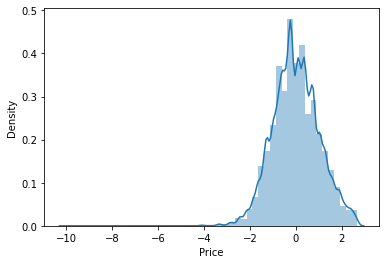

In [204]:
sns.distplot(y)
y.skew()

In [205]:
y.skew()

-0.012436203431318498

In [206]:
log=np.log(y)
reciprocal=np.reciprocal(y)

In [209]:
log.skew()

-0.8988245736500987

<AxesSubplot:xlabel='Price'>

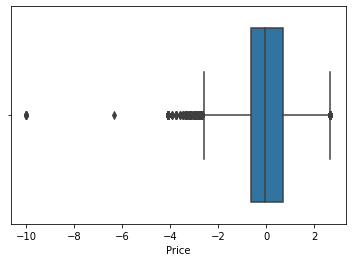

In [210]:
sns.boxplot(y)

In [ ]:
# as data is showing some skewness we try to remove outliers 

In [211]:
q1 = df_final.quantile(0.25)
q3 = df_final.quantile(0.75)

iqr = q3 - q1

# Lower Limit and Upper Limit

lower_lim = q1 - 1.5*iqr
upper_lim = q3 + 1.5*iqr

In [212]:

df_wtoutliers = df_final[~((df_final<lower_lim)|(df_final>upper_lim)).any(axis = 1)]
df_wtoutliers.shape

(21910, 46)

In [214]:
df_final.shape

(132581, 46)

In [215]:
x2=df_wtoutliers.drop('Price',axis=1)
y2=df_wtoutliers['Price']
x2= sm.add_constant(x2)                     # r2 score decreases beacuse we loss the alsmost 83.57% of data after removing outliers
SLR_model_2 = sm.OLS(y2,x2).fit()   # it is of no significant 
print(SLR_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     530.2
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:04:41   Log-Likelihood:                -21627.
No. Observations:               21910   AIC:                         4.332e+04
Df Residuals:                   21879   BIC:                         4.356e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Ho

In [216]:
# removing outliers is of not use 

In [217]:
# so going with the same first ols model

In [221]:
signi_feat = SLR_model.pvalues[SLR_model.pvalues<0.05].index
len(signi_feat)                      # we already have built a model on p values les s than 0.05 
                                     # model was giving almost r2 score 
                                     # also we can say that giving same performance 

37

In [222]:
# normality test
# Ho: Data is Normal
# Ha: Data is not Normal
stats.shapiro(SLR_model.resid)

ShapiroResult(statistic=0.9796359539031982, pvalue=0.0)

In [224]:
## JarQue Bera Test of Normality
stats.jarque_bera(SLR_model.resid)

Jarque_beraResult(statistic=165766.52691434431, pvalue=0.0)

In [225]:
#####Linearity: Rainbow Test
#Ho: Model shows the Sign of Linearity. Linear Relationship between Predictors and Target

#Ha: Model is not Linearity. Since, it is not Linear, So LR cannot be applied

In [226]:
import statsmodels.api as sma

sma.stats.diagnostic.linear_rainbow(SLR_model) # tstats, pvalue

# Inf: that there is a linear relationship between pred and tgt s p value is greater than 0.05

(1.001736510617265, 0.41164493787779266)

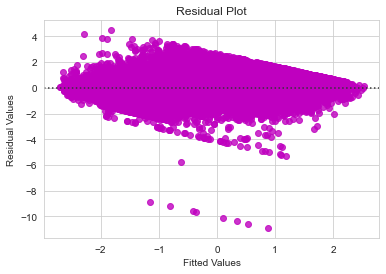

In [227]:
# alsoplotting residual plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid") # theme of plot...

sns.residplot(SLR_model.fittedvalues, SLR_model.resid, color = "m")
plt.xlabel("Fitted Values")
plt.ylabel("Residual Values")
plt.title("Residual Plot")
plt.show()

# LR is a good model.

In [228]:
# cleraly seen from residual plot lr is not a good model

In [ ]:
## multicollinearity
#condition no greaer than 1000 has strong muticollinearity
# our cn was > 1000 which shows our data has multicollinearity

In [ ]:
# now we have to see the which features are higly collinear by applying vif
#Thum Rule: VIF = 1:No Collinearity, 1 -5: Moderate, >5: Highly Collinear...

In [230]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x

vif = pd.DataFrame()

mylist = []

for i in range(x.shape[1]):
    mylist.append(variance_inflation_factor(x.values, i))

In [233]:
pd.DataFrame({"Feat": x.columns, 
              "VIF": mylist}).sort_values(by = "VIF", ascending = False)

,Feat,VIF
0,const,170.511848
13,Availability 60,27.598338
14,Availability 90,18.109207
12,Availability 30,7.540548
27,HostNeighbourhood_freq,4.801340
33,Neighbourhood_freq,4.720572
39,Bed Type_Real Bed,4.287016
2,Accommodates,3.541146
17,Review Scores Rating,3.391984
5,Beds,2.927050


In [ ]:
# as we can see that features vif >5 are higly collinear

In [234]:
### auto correltion of errors

In [ ]:
Ho: No AutoCorrelation Exists

Ha: AutoCorr Exists

In [235]:
from statsmodels.stats.stattools import durbin_watson

print("DW Statistic: ", durbin_watson(SLR_model.resid)) # NO Autocorrelation...

DW Statistic:  1.6686215207837292


In [236]:
###### hetroedascitcity
# Bresuch Pagan Test:

# Ho: Residuals are not Heterskedastic
# Ha: Ho is False...

predictors = df_final.drop("Price", axis = 1)

from statsmodels.stats.diagnostic import het_breuschpagan

test = het_breuschpagan(SLR_model.resid, predictors)

In [237]:
test[-1] # Since the PValue is < 0.05, We Reject the Ho...

0.0

In [ ]:
### all the assumptions are finished

In [ ]:
##################
# regression model

In [169]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)

In [171]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [172]:
mean_absolute_error(ytest,pred)

0.4790871147215699

In [173]:
mean_squared_error(ytest,pred)

0.3935046444647945

In [174]:
np.sqrt(mean_squared_error(ytest,pred))

0.6272994854651122

In [176]:
r2_score(ytest,pred)

0.6040324125754275

In [175]:
# now applying cross validation score
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression



kf=KFold(n_splits=5)
score=cross_val_score(lr,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))
print()

Cross Validation Scores are [0.61011106 0.60017522 0.60822479 0.61894265 0.59163634]
Average Cross Validation score :0.6058180110258113


In [177]:
# by applying croos validation r2 score increaese from 60.40 to 60.58

In [179]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr, X=x,y=y,scoring='neg_mean_squared_error', cv =kf)
accuracies.mean()

-0.39386333405194596

In [182]:
mean_sqaured_error =0.39
# so
print('rmse:',np.sqrt(0.39))

rmse: 0.6244997998398398


In [183]:
# slight decraese in rmse from 0.6272 to 0.6244

In [185]:
# now applying feature slection


In [186]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

lr = LinearRegression()

# forward = True : Forward Selection Method...

sfsModel = sfs(estimator = lr, k_features = "best", forward=True, cv = 5, scoring = "r2") 

sfsModel.fit(x, y)

print("Best Features: ", sfsModel.k_feature_names_)
print("R2 Score: ", sfsModel.k_score_)

Best Features:  ('Host Response Rate', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Cleanliness', 'Review Scores Location', 'Review Scores Value', 'Calculated host listings count', 'Reviews per Month', 'HostResponseTime_ord', 'HostNeighbourhood_freq', 'NeighbourhoodCleansed_freq', 'State_freq', 'Zipcode_freq', 'Market_freq', 'Neighbourhood_freq', 'Room Type_Private room', 'Room Type_Shared room', 'Bed Type_Couch', 'Bed Type_Futon', 'Bed Type_Pull-out Sofa', 'Bed Type_Real Bed', 'Cancellation Policy_long_term', 'Cancellation Policy_strict', 'Cancellation Policy_super_strict_30', 'Cancellation Policy_super_strict_60')
R2 Score:  0.6058716095766072


In [187]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

lr = LinearRegression()

# forward = True : Forward Selection Method...

sfsModel = sfs(estimator = lr, k_features = "best", forward=True, cv = 5, scoring = 'neg_mean_squared_error') 

sfsModel.fit(x, y)

print("Best Features: ", sfsModel.k_feature_names_)
print("R2 Score: ", sfsModel.k_score_)

Best Features:  ('Host Response Rate', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Cleanliness', 'Review Scores Location', 'Review Scores Value', 'Calculated host listings count', 'Reviews per Month', 'HostResponseTime_ord', 'HostNeighbourhood_freq', 'NeighbourhoodCleansed_freq', 'State_freq', 'Zipcode_freq', 'Market_freq', 'Neighbourhood_freq', 'Room Type_Private room', 'Room Type_Shared room', 'Bed Type_Couch', 'Bed Type_Futon', 'Bed Type_Pull-out Sofa', 'Bed Type_Real Bed', 'Cancellation Policy_long_term', 'Cancellation Policy_strict', 'Cancellation Policy_super_strict_30', 'Cancellation Policy_super_strict_60')
R2 Score:  -0.39380961390275826


In [ ]:
# using cv =kf  in place of sf

In [188]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

lr = LinearRegression()

# forward = True : Forward Selection Method...

sfsModel = sfs(estimator = lr, k_features = "best", forward=True, cv = kf, scoring = "r2") 

sfsModel.fit(x, y)

print("Best Features: ", sfsModel.k_feature_names_)
print("R2 Score: ", sfsModel.k_score_)

Best Features:  ('Host Response Rate', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Cleanliness', 'Review Scores Location', 'Review Scores Value', 'Calculated host listings count', 'Reviews per Month', 'HostResponseTime_ord', 'HostNeighbourhood_freq', 'NeighbourhoodCleansed_freq', 'State_freq', 'Zipcode_freq', 'Market_freq', 'Neighbourhood_freq', 'Room Type_Private room', 'Room Type_Shared room', 'Bed Type_Couch', 'Bed Type_Futon', 'Bed Type_Pull-out Sofa', 'Bed Type_Real Bed', 'Cancellation Policy_long_term', 'Cancellation Policy_strict', 'Cancellation Policy_super_strict_30', 'Cancellation Policy_super_strict_60')
R2 Score:  0.6058716095766072


In [189]:
# not much difference 

In [190]:
# now applying rfe

In [192]:
a=['Host Response Rate', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Cleanliness', 'Review Scores Location', 'Review Scores Value', 'Calculated host listings count', 'Reviews per Month', 'HostResponseTime_ord', 'HostNeighbourhood_freq', 'NeighbourhoodCleansed_freq', 'State_freq', 'Zipcode_freq', 'Market_freq', 'Neighbourhood_freq', 'Room Type_Private room', 'Room Type_Shared room', 'Bed Type_Couch', 'Bed Type_Futon', 'Bed Type_Pull-out Sofa', 'Bed Type_Real Bed', 'Cancellation Policy_long_term', 'Cancellation Policy_strict', 'Cancellation Policy_super_strict_30', 'Cancellation Policy_super_strict_60']
len(a)

38

In [193]:
df_final.shape

(132581, 46)

In [196]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=lr,n_features_to_select=38)
rfe_feats=rfe.fit_transform(x,y)
rfe.score(x,y)

0.6056524230868179

In [238]:
# rfe also is doing the same work 

In [ ]:
# now applying models other than baseline

In [ ]:
# applying dcision tree

In [243]:
# Decision Tree Model

from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()

xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size = 0.20, random_state = 10)

pred = dtree.fit(xtrain, ytrain).predict(xtest)
print("RMSE: ", np.sqrt(mean_squared_error(ytest, pred)))
print('r2 score' ,r2_score(ytest,pred))

RMSE:  0.7778834988879606
r2 score 0.39110992813502565


In [246]:
print('rmse decision tree',np.sqrt(0.7778834988879606)

0.8819770398870713

In [244]:
# it is not working good as it increarses the rmse and drops the r2 score

In [ ]:
# now going with the random forest


In [286]:
# random forest base model
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(xtrain,ytrain)
pred2=regressor.predict(xtest)

In [287]:
mean_absolute_error(ytest,pred2)

0.39054804378443486

In [288]:
mean_squared_error(ytest,pred2)

0.28183619477582933

In [289]:
np.sqrt(mean_squared_error(ytest,pred2))

0.5308824679491962

In [290]:
r2_score(ytest,pred2)

0.7163997943503527

In [ ]:
## now building for n_estimators =20

In [257]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=20,random_state=10)
regressor.fit(xtrain,ytrain)
pred2=regressor.predict(xtest)

In [248]:
mean_absolute_error(ytest,pred2)

0.4010776501599197

In [249]:
mean_squared_error(ytest,pred2)


0.29542718610745444

In [250]:
print('rmse',np.sqrt(0.29542718610745444))

rmse 0.5435321389830177


In [251]:
r2_score(ytest,pred2)

0.7027237370941255

In [252]:
np.sqrt(0.39380961390275826)

0.6275425195974838

In [253]:
######### raandom forest shows a better results as it was able to decarease the rmse from 0.62(lr model)
##  and rmse of 0.88 (decision tree) to 0.54 

In [254]:
## also it improves the scores of r2 from 0.60 (lr model) and r2 score 0.30 (decison tree ) to 0.70

In [255]:
df_final.shape

(132581, 46)

In [256]:
# Adjusted R Squared = 1 - ((1-R_sq)*(n - 1))/n-p-1

N = len(df_final)
p = 46 
r_sq=0.7027237370941255
adj_r2 = 1 - ((1 - r_sq)*(N-1))/(N-p-1)

print("Adjusted R2: ", adj_r2)



Adjusted R2:  0.7026205582261091


In [262]:
## random forest is going good as a djusted r2 score is also coming out to be 0.70

In [263]:
# now tunning thee random forest 

In [266]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [2,10,100], 'max_features': ['auto', 'log2'], 'n_estimators': [5,10,20,40,50,100]}

In [267]:

#

rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [268]:
g_search.fit(xtrain, ytrain);

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 100, 'max_features': 'log2', 'n_estimators': 100}


In [325]:
print(g_search.score(xtest, ytest))

0.7174559540426688


In [280]:
from sklearn.ensemble import RandomForestRegressor
regressor1=RandomForestRegressor(n_estimators=100,bootstrap=True,max_depth= 100,max_features='log2',random_state=1)
regressor1.fit(xtrain,ytrain)
pred3=regressor1.predict(xtest)

In [281]:
r2_score(ytest,pred3)

0.7174559540426688

In [282]:
mean_absolute_error(ytest,pred3)

0.39387040293820597

In [308]:
mean_squared_error(ytest,pred3)

0.28078660446232395

In [284]:
np.sqrt(mean_squared_error(ytest,pred3))   # we are able to reduec the rmse 

0.5298930122791996

In [285]:
# now going with the randomized search cv

In [293]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 

max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 

max_depth.append(None)

bootstrap = [True, False]

r_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'bootstrap': bootstrap}

#print(random_grid)



In [297]:
rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20, scoring='neg_mean_absolute_error', cv = 5, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

rfr_random.fit(xtrain, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, None],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 15]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [299]:
print(rfr_random.best_params_)

{'n_estimators': 12, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


In [301]:
print(rfr_random.score(xtest , ytest))

-0.4081070045714603


In [321]:
from sklearn.ensemble import RandomForestRegressor
regressor3=RandomForestRegressor(n_estimators=80,bootstrap=True,max_depth= None,max_features='auto',random_state=1)
regressor3.fit(xtrain,ytrain)
pred5=regressor3.predict(xtest)

In [322]:
mean_absolute_error(ytest,pred5)

0.3915433025864295

In [323]:
mean_squared_error(ytest,pred5)

0.28273838659504974

In [324]:
np.sqrt(mean_squared_error(ytest,pred5))

0.5317314985921463

In [327]:
r2_score(ytest,pred5)

0.7154919557185195

In [335]:
from sklearn.ensemble import RandomForestRegressor
regressor6=RandomForestRegressor(n_estimators=80,bootstrap=True,max_depth= 100,max_features=20,random_state=1)
regressor6.fit(xtrain,ytrain)
pred5=regressor6.predict(xtest)

In [336]:
mean_absolute_error(ytest,pred5)

0.38873187709990825

In [337]:
mean_squared_error(ytest,pred5)

0.27753814996466886

In [338]:
np.sqrt(mean_squared_error(ytest,pred5))  # abhi tak ki sbse km rmse

0.5268188967422001

In [332]:
r2_score(ytest,pred5)

0.7059855160731128

In [342]:
from sklearn.ensemble import RandomForestRegressor
regressor6=RandomForestRegressor(n_estimators=80,bootstrap=True,max_depth= 120,max_features=25,random_state=1)
regressor6.fit(xtrain,ytrain)
pred5=regressor6.predict(xtest)

In [343]:
mean_absolute_error(ytest,pred5)

0.38902808481090334

In [344]:
mean_squared_error(ytest,pred5)

0.2777913217771356

In [345]:
###### apllying xg boost

In [346]:
from sklearn import datasets, ensemble

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

default_model_xgb = ensemble.GradientBoostingRegressor(**params)
default_model_xgb.fit(x,y)
#reg.fit(X_train, y_train)
#mse = mean_squared_error(y_test, reg.predict(X_test))

#default_xgb_scores = cross_val_score(default_model_xgb, df_prepared, df_labels,
#                                scoring="neg_mean_squared_error", cv=2)
#default_xgb_rmse_scores = np.sqrt(-default_xgb_scores)
#display_scores(default_xgb_rmse_scores)

GradientBoostingRegressor(learning_rate=0.01, loss='ls', max_depth=4,
                          min_samples_split=5, n_estimators=500)

In [349]:
default_model_xgb.fit(xtrain, ytrain)
mse = mean_squared_error(ytest, default_model_xgb.predict(xtest))

default_xgb_scores = cross_val_score(default_model_xgb,x,y,
                               scoring="neg_mean_squared_error", cv=2)
default_xgb_rmse_scores = np.sqrt(default_xgb_scores)
display_scores(default_xgb_rmse_scores)

NameError: name 'display_scores' is not defined

In [122]:
####### pca

In [124]:
df_num_encoded.head()

,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
0,0.442374,-1.817371,-0.433181,-0.246826,-0.824713,-2.829488,0.022807,-2.415490,-0.544120,-0.887795,...,0.605841,0.907361,0.521792,0.645175,0.378724,0.368473,-1.587348,0.679343,0.731315,1.341142
1,0.442374,-0.559210,0.761510,-0.246826,-0.824713,-0.985088,0.022807,-2.056132,0.874093,1.155845,...,1.162536,-0.339419,0.521792,0.645175,0.378724,0.368473,-1.587348,0.679343,-0.732494,0.625529
2,0.442374,-0.559210,-0.433181,-0.246826,-0.824713,-1.680376,0.022807,-2.725133,0.874093,0.956738,...,-0.508258,0.907361,0.521792,-1.351961,0.378724,0.368473,0.601531,0.679343,-0.732494,0.733469
3,0.442374,1.293898,-0.433181,0.908157,1.366131,-0.985088,0.022807,-1.609814,0.874093,0.783323,...,0.080734,-0.083020,-1.879802,-1.351961,0.378724,0.368473,-1.587348,0.679343,0.731315,1.851491
4,-0.470286,-0.559210,-0.433181,-0.246826,-0.824713,-1.680376,0.022807,-2.165562,-0.544120,0.783323,...,1.509619,-0.339419,0.521792,-1.351961,0.378724,0.368473,-1.865108,-1.352907,1.256973,1.928591


In [134]:
df_cat_encoded.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [127]:
df_cat_encoded=df_cat_encoded.reset_index().drop('index',inplace=True,axis=1)

In [255]:
df_cat1=df_cat_encoded.reset_index()

In [257]:
df_cat1.drop('index',axis=1,inplace=True)

In [258]:
df_cat1.head()

,HostResponseTime_ord,HostNeighbourhood_freq,NeighbourhoodCleansed_freq,State_freq,Zipcode_freq,Market_freq,PropertyType_freq,Neighbourhood_freq,Room Type_Private room,Room Type_Shared room,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Cancellation Policy_long_term,Cancellation Policy_moderate,Cancellation Policy_no_refunds,Cancellation Policy_strict,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
0,1,0.124452,0.036959,3.911571,0.345449,3.892715,57.091137,0.116910,1,0,0,0,0,1,0,0,0,1,0,0
1,3,0.124452,0.036959,3.911571,0.022628,3.892715,30.984832,0.116910,1,0,0,0,0,1,0,0,0,0,0,0
2,1,0.124452,0.036959,3.911571,0.022628,3.892715,57.091137,0.116910,1,0,0,0,0,1,0,1,0,0,0,0
3,1,0.124452,0.036959,3.911571,0.022628,3.892715,57.091137,22.362933,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0.030924,0.040730,3.911571,0.027153,3.892715,30.984832,0.030924,1,0,0,0,0,1,0,0,0,1,0,0


In [260]:
df_project=pd.concat([df_num_encoded,df_cat1],axis=1)

In [261]:
df_project.head()

,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,...,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Cancellation Policy_long_term,Cancellation Policy_moderate,Cancellation Policy_no_refunds,Cancellation Policy_strict,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
0,0.442374,-1.817371,-0.433181,-0.246826,-0.824713,-2.829488,0.022807,-2.415490,-0.544120,-0.887795,...,0,0,0,1,0,0,0,1,0,0
1,0.442374,-0.559210,0.761510,-0.246826,-0.824713,-0.985088,0.022807,-2.056132,0.874093,1.155845,...,0,0,0,1,0,0,0,0,0,0
2,0.442374,-0.559210,-0.433181,-0.246826,-0.824713,-1.680376,0.022807,-2.725133,0.874093,0.956738,...,0,0,0,1,0,1,0,0,0,0
3,0.442374,1.293898,-0.433181,0.908157,1.366131,-0.985088,0.022807,-1.609814,0.874093,0.783323,...,0,0,0,1,0,0,0,0,0,0
4,-0.470286,-0.559210,-0.433181,-0.246826,-0.824713,-1.680376,0.022807,-2.165562,-0.544120,0.783323,...,0,0,0,1,0,0,0,1,0,0


In [263]:
x=df_project.drop('Price',axis=1)
y=df_project['Price']

In [265]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.90)
pca.fit(x)
print(pca.components_)
print()
print(pca.explained_variance_)
print()
print(pca.explained_variance_ratio_)

[[ 2.62882102e-03  8.85206099e-03  8.72209374e-03  8.78336031e-03
   8.44727526e-03  8.98652395e-04  1.73803834e-03  3.23158948e-03
   1.17167130e-03 -4.87076028e-03  2.10240636e-04  9.01353668e-03
   9.00440808e-03  9.03175469e-03  8.81314558e-03  2.70399132e-03
   3.87665402e-03  3.22853824e-03  5.71619864e-03  3.93228444e-03
   2.73107627e-03  6.16762700e-04  4.13595929e-03  7.10322873e-03
   6.16490879e-03 -1.68904116e-03 -3.08998376e-03 -1.11871045e-02
  -3.10622329e-01 -4.49752803e-03 -3.48497598e-01 -8.83756370e-01
   3.76021549e-03 -1.83105046e-04  4.04832030e-05 -2.31731416e-05
   1.95650069e-06 -2.53389992e-05  6.74231904e-05  5.91673748e-08
   8.36378270e-04  1.59263528e-06 -2.62727825e-04  1.55550262e-05
   7.63625605e-05]
 [-1.41180389e-03 -7.04328501e-03 -4.72107114e-04 -2.64622956e-03
  -3.21230471e-03  1.75479142e-03  1.56233645e-03 -2.33844235e-03
   2.56719932e-03  3.63055840e-03 -2.76866414e-03 -4.88337479e-04
   1.89413673e-04 -2.46938164e-05  2.10459324e-04 -2.9917

In [267]:
df_pca=pd.DataFrame(pca.transform(x))
df_pca.columns=['PC1','PCA2','PCA3','PCA4']
df_pca.head()

,PC1,PCA2,PCA3,PCA4
0,-2.267563,-28.014560,-6.047600,0.299696
1,20.901851,-16.158185,-6.030093,3.061034
2,-2.224001,-28.023174,-5.997747,0.265633
3,-2.077997,-27.848147,11.732890,-0.816855
4,20.860290,-16.147528,-6.189663,3.084411


In [270]:
df_pca['Price_1']=df_project['Price']

In [271]:
df_pca.head()

,PC1,PCA2,PCA3,PCA4,Price_1
0,-2.267563,-28.014560,-6.047600,0.299696,-2.829488
1,20.901851,-16.158185,-6.030093,3.061034,-0.985088
2,-2.224001,-28.023174,-5.997747,0.265633,-1.680376
3,-2.077997,-27.848147,11.732890,-0.816855,-0.985088
4,20.860290,-16.147528,-6.189663,3.084411,-1.680376


In [274]:
x1=df_pca.drop('Price_1',axis=1)
y1=df_pca['Price_1']

In [275]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,random_state=10,test_size=0.20)

In [276]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [277]:
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)

In [278]:
r2_score(ytest,pred)

0.019659178235528096

In [281]:
np.sqrt(mean_squared_error(ytest,pred))

0.9870375074090832

In [288]:
df15=df10.reset_index()
df100=df15.drop('index',axis=1)

In [290]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_scall=sc.fit_transform(df100)

In [291]:
df_scall1=pd.DataFrame(df_scall,columns=df100.columns)

In [302]:
df_cat2=df_cat_encoded.reset_index().drop('index',axis=1)


In [323]:
df_final2=pd.concat([df100,df_cat2],axis=1)

In [324]:
x3=df_final2.drop('Price',axis=1)
y3=df_final2['Price']

In [316]:
x_train,x_test,y_train,y_test=train_test_split(x3,y2,random_state=10,test_size=0.80)

In [317]:
model1=lr.fit(x_train,y_train)
pred11=model1.predict(x_test)

In [318]:
r2_score(y_test,pred11)

0.4985958320036371

In [308]:
mean_squared_error(y_test,pred11)

0.5060131186720326

In [310]:
from sklearn.ensemble import RandomForestRegressor

In [311]:
rfs=RandomForestRegressor()

In [313]:
model2=rfs.fit(x_train,y_train)

In [319]:
pred12=model2.predict(x_test)

## 

In [320]:
r2_score(y_test,pred12)

0.5983153748046401

In [322]:
np.sqrt(mean_squared_error(y_test,pred12))

0.6366921902848187